In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, recall_score, RocCurveDisplay,
                             PrecisionRecallDisplay, precision_recall_curve,classification_report, confusion_matrix,
                             f1_score, ConfusionMatrixDisplay, roc_curve, plot_confusion_matrix)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import lightgbm as lgb
from datetime import datetime
import os

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}

<IPython.core.display.Javascript object>

In [3]:
#Directory for all images
dir_path = "Results"
if not os.path.isdir(dir_path):
    os.mkdir(dir_path, exist_ok=True)

In [4]:
data = pd.read_csv('cardio_updated.csv')
data

,Age,Gender,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Cholesterol,Glucose,Smoking,Alcohol Intake,Physical Activity,Diagnosis,BMI
0,50,Male,168,62,110,80,Normal,Normal,No,No,Yes,No,22.0
1,55,Female,156,85,140,90,Extremely High,Normal,No,No,Yes,Yes,34.9
2,52,Female,165,64,130,70,Extremely High,Normal,No,No,No,Yes,23.5
3,48,Male,169,82,150,100,Normal,Normal,No,No,Yes,Yes,28.7
4,48,Female,156,56,100,60,Normal,Normal,No,No,No,No,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68670,53,Male,168,76,120,80,Normal,Normal,Yes,No,Yes,No,26.9
68671,62,Female,158,126,140,90,High,High,No,No,Yes,Yes,50.5
68672,52,Male,183,105,180,90,Extremely High,Normal,No,Yes,No,Yes,31.4
68673,61,Female,163,72,135,80,Normal,High,No,No,No,Yes,27.1


In [5]:
feature_names = data.columns
feature_names

Index(['Age', 'Gender', 'Height', 'Weight', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Cholesterol', 'Glucose', 'Smoking',
       'Alcohol Intake', 'Physical Activity', 'Diagnosis', 'BMI'],
      dtype='object')

In [6]:
columns = ['Gender', 'Cholesterol', 'Glucose', 'Smoking', 'Alcohol Intake', 'Physical Activity', 'Diagnosis']
data[columns] = data[columns].apply(LabelEncoder().fit_transform)
data[columns] = data[columns].apply(LabelEncoder().fit_transform)
data

,Age,Gender,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Cholesterol,Glucose,Smoking,Alcohol Intake,Physical Activity,Diagnosis,BMI
0,50,1,168,62,110,80,2,2,0,0,1,0,22.0
1,55,0,156,85,140,90,0,2,0,0,1,1,34.9
2,52,0,165,64,130,70,0,2,0,0,0,1,23.5
3,48,1,169,82,150,100,2,2,0,0,1,1,28.7
4,48,0,156,56,100,60,2,2,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68670,53,1,168,76,120,80,2,2,1,0,1,0,26.9
68671,62,0,158,126,140,90,1,1,0,0,1,1,50.5
68672,52,1,183,105,180,90,0,2,0,1,0,1,31.4
68673,61,0,163,72,135,80,2,1,0,0,0,1,27.1


In [7]:
X = data.drop(['Diagnosis'],axis=1)
Y = data['Diagnosis']
print(X.shape)
print(Y.shape)

(68675, 12)
(68675,)


In [8]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

## LightGBM

In [9]:
def lgbm_model(X, Y, param = dict()) :
    train_data=lgb.Dataset(X,label=Y)
    num_round=50
    start = datetime.now()
    lgbm=lgb.train(param,train_data,num_round)
    end = datetime.now()
    #Execution time of the model
    execution_time_lgbm = end-start
    print("Execution Time of Model is : {}".format(execution_time_lgbm))
    return lgbm

In [10]:
lgbm = lgbm_model(X_train, Y_train)
Y_pred=lgbm.predict(X_test)
for i in range(0,Y_pred.shape[0]):
    if Y_pred[i]>=.5:       # setting threshold to .5
       Y_pred[i]=1
    else:  
       Y_pred[i]=0
accuracy = accuracy_score(Y_pred,Y_test)
print("Accuracy Score {}:".format(accuracy))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.181871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 54940, number of used features: 12
[LightGBM] [Info] Start training from score 0.495377
Execution Time of Model is : 0:00:02.262415
Accuracy Score 0.7332362577357117:


## Standard Scalar

In [11]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

In [12]:
param = {'num_leaves':100, 
         'objective':'binary',
         'max_depth':7,
         'learning_rate':.05,
         'max_bin':200,
         'min_gain_to_split' : 0.5,
         'min_data_in_leaf' : 100,
         'metric' :['auc', 'binary_logloss']} 
lgbm = lgbm_model(X_train_scaled, Y_train, param)
Y_pred=lgbm.predict(X_test_scaled)
for i in range(0,Y_pred.shape[0]):
    if Y_pred[i]>=.5:       # setting threshold to .5
       Y_pred[i]=1
    else:  
       Y_pred[i]=0
accuracy = accuracy_score(Y_pred,Y_test)
print("Accuracy Score {}:".format(accuracy))

[LightGBM] [Info] Number of positive: 27216, number of negative: 27724
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.188414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 54940, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495377 -> initscore=-0.018493
[LightGBM] [Info] Start training from score -0.018493
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

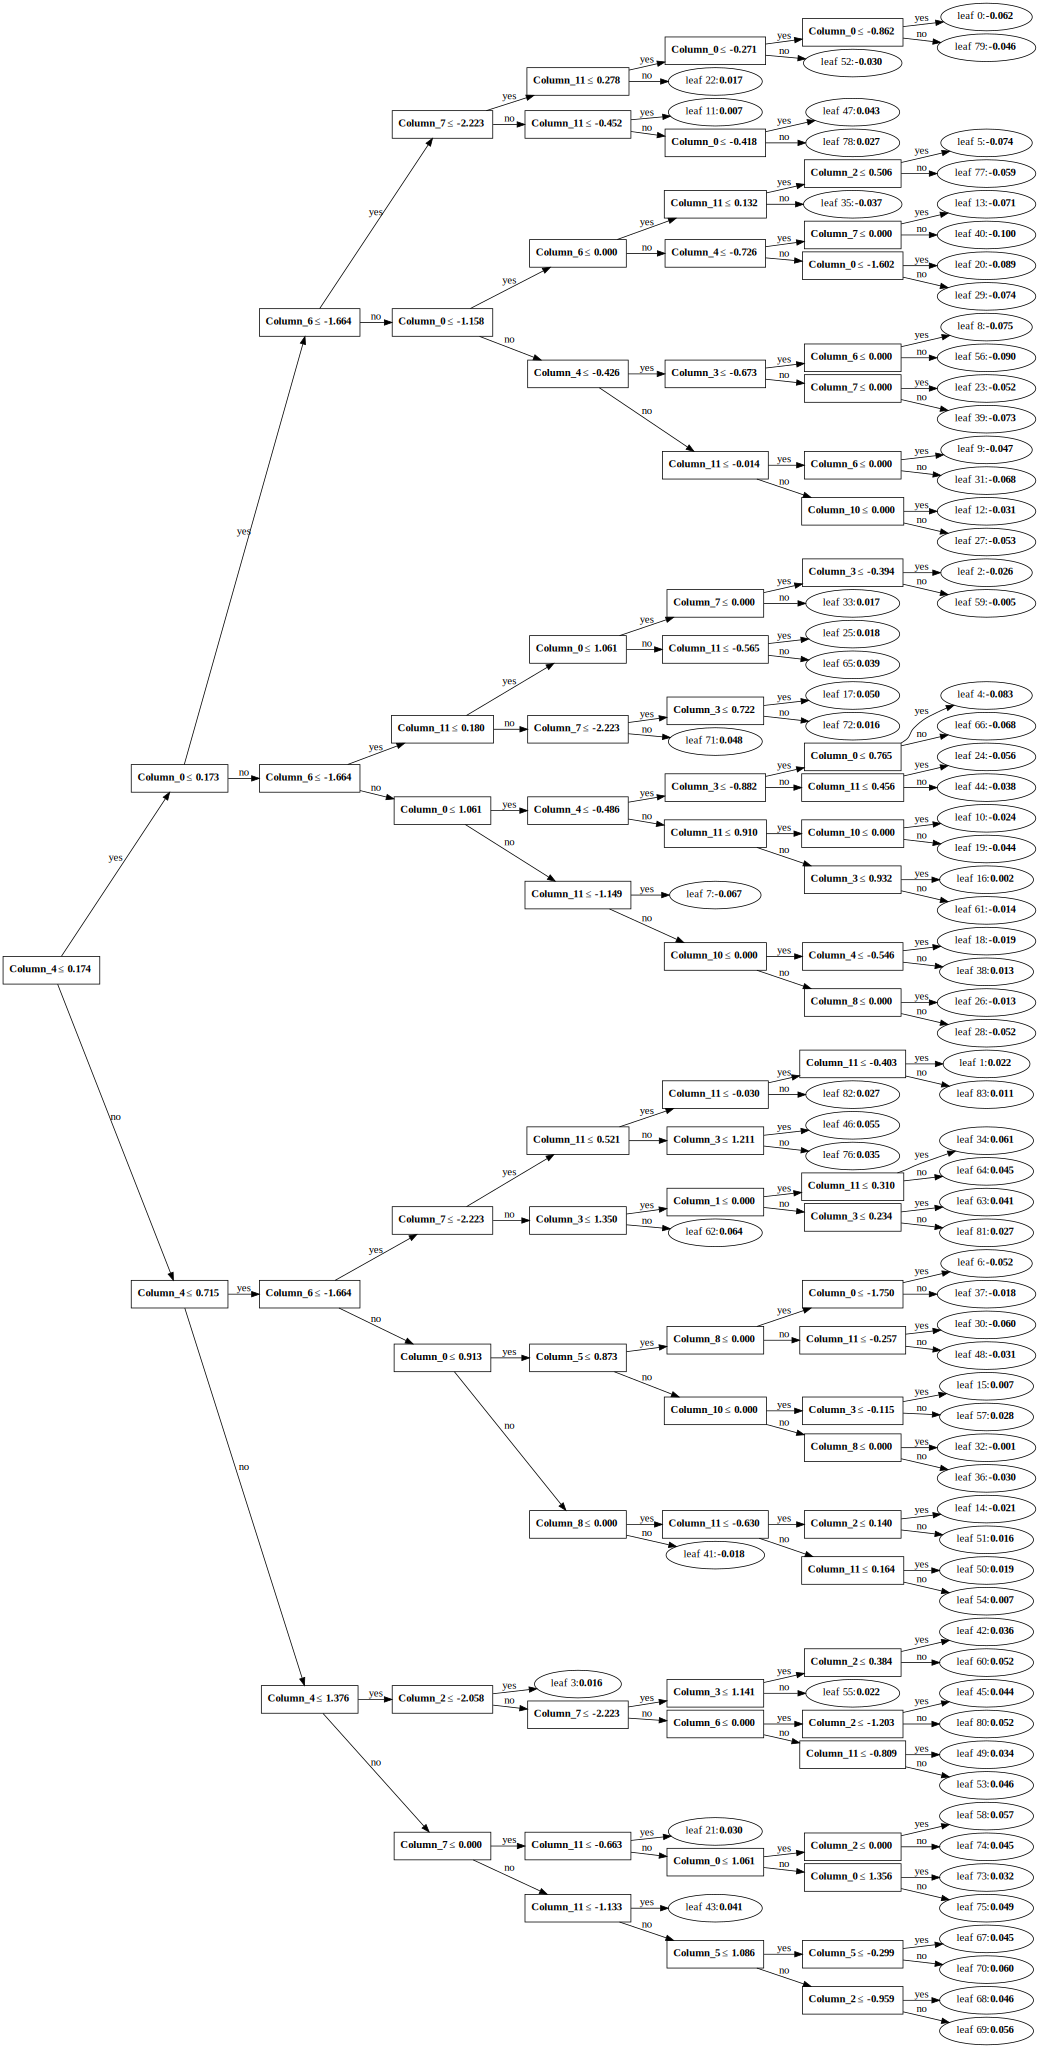

In [13]:
#Display the graph
graph = lgb.create_tree_digraph(lgbm)
graph.render("LGBM",directory="Results",format="png", view=False)
display(graph)

## Evaluation Metrics

In [14]:
# Accuracy Score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy Score {}:".format(accuracy))

Accuracy Score 0.7322897706589007:


In [15]:
# Precision Score
precision = precision_score(Y_test, Y_pred)
print("Precision Score {}:".format(precision))

Precision Score 0.7481337228172671:


In [16]:
# Recall Score
recall = recall_score(Y_test, Y_pred)
print("Recall Score {}:".format(recall))

Recall Score 0.6844840386043058:


In [17]:
# F1 Score
f1 = f1_score(Y_test, Y_pred)
print("F1 Score {}:".format(f1))

F1 Score 0.7148949368070094:


In [18]:
# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report")
print(class_report)

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      7000
           1       0.75      0.68      0.71      6735

    accuracy                           0.73     13735
   macro avg       0.73      0.73      0.73     13735
weighted avg       0.73      0.73      0.73     13735



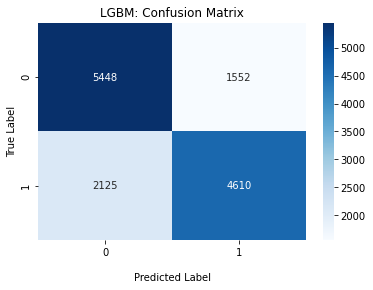

In [19]:
# Confusion Matrix
cf_matrix = confusion_matrix(Y_test, Y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
ax.set_title('LGBM: Confusion Matrix');
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label');
plt.savefig(os.path.join(dir_path,"LGBM_Confusion_Matrix.png"))
plt.show()

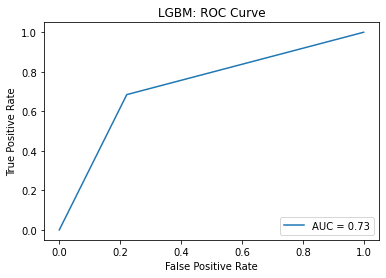

In [20]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
disp.plot()
plt.title("LGBM: ROC Curve")
plt.savefig(os.path.join(dir_path,"LGBM_ROC.png"))
plt.show()

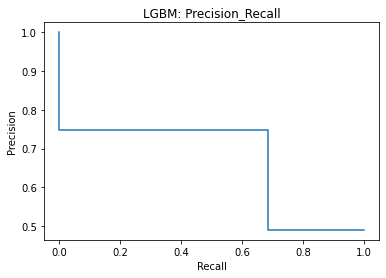

In [21]:
#Precision Recall Curve
prec, rec, thresholds_2 = precision_recall_curve(Y_test, Y_pred)
disp = PrecisionRecallDisplay(precision=prec, recall=rec)
disp.plot()
plt.title("LGBM: Precision_Recall")
plt.savefig(os.path.join(dir_path,"LGBM_Precision_Recall.png"))
plt.show()